
## Customer Churn Prediction
**Objective:** Predict customer churn using historical data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
sns.set(style='whitegrid')

In [2]:
# Load sample dataset
from sklearn.datasets import fetch_openml
data = fetch_openml('Telco-Customer-Churn', version=1, as_frame=True)
df = data.frame
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,'No phone service',DSL,No,Yes,No,No,No,No,Month-to-month,Yes,'Electronic check',29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,'One year',No,'Mailed check',56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,'Mailed check',53.85,108.15,Yes
3,Male,0,No,No,45,No,'No phone service',DSL,Yes,No,Yes,Yes,No,No,'One year',No,'Bank transfer (automatic)',42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,'Fiber optic',No,No,No,No,No,No,Month-to-month,Yes,'Electronic check',70.70,151.65,Yes


In [3]:
# Preprocess data
df = df.dropna()
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)
df = pd.get_dummies(df, drop_first=True)
df.head()

,SeniorCitizen,tenure,MonthlyCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No,MultipleLines_Yes,...,TotalCharges_995.35,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9
0,0,1,29.85,0,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0,34,56.95,0,True,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
2,0,2,53.85,1,True,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
3,0,45,42.30,0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0,2,70.70,1,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False


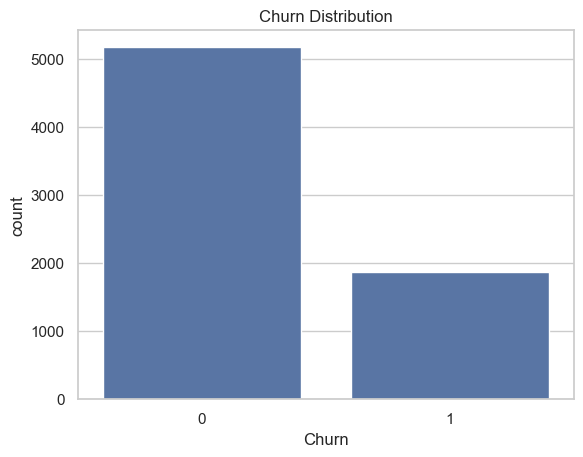

In [4]:
# Visualize churn distribution
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

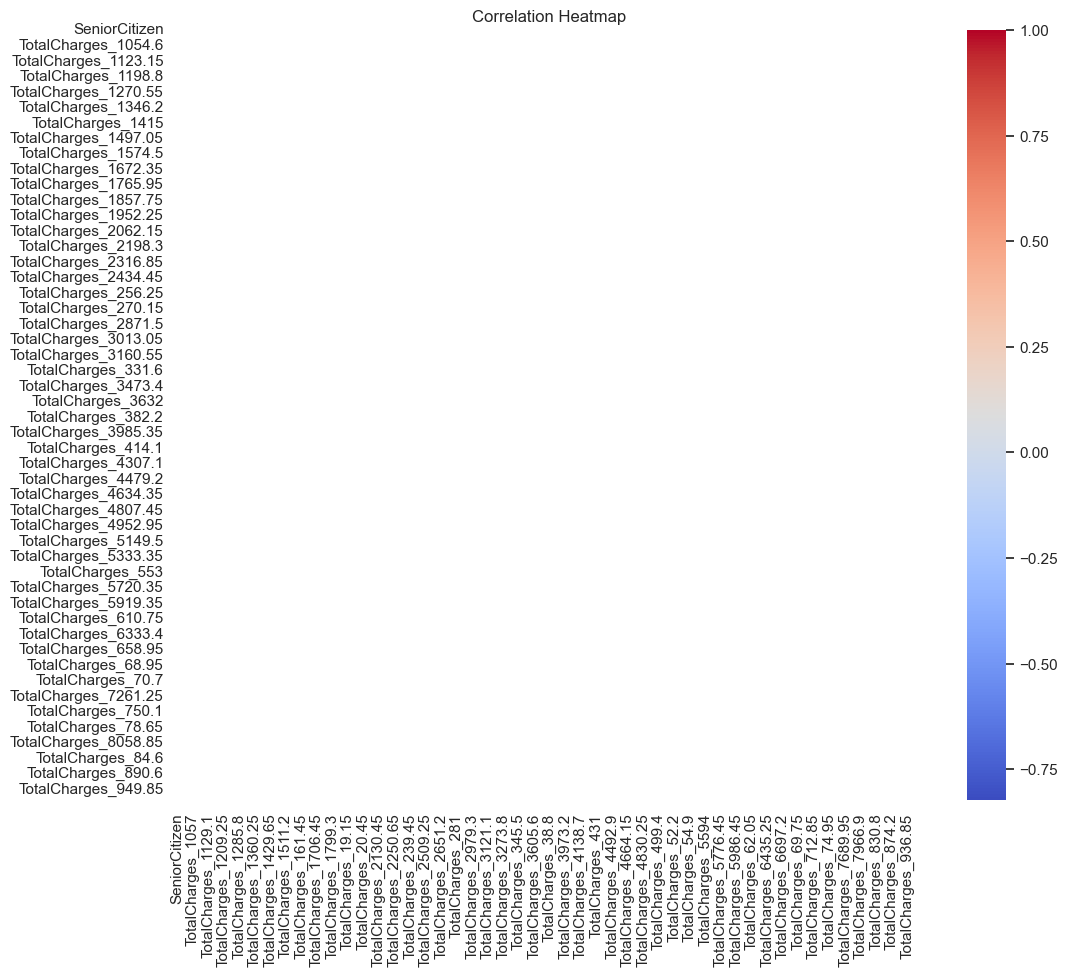

In [5]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [6]:
# Train-test split
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

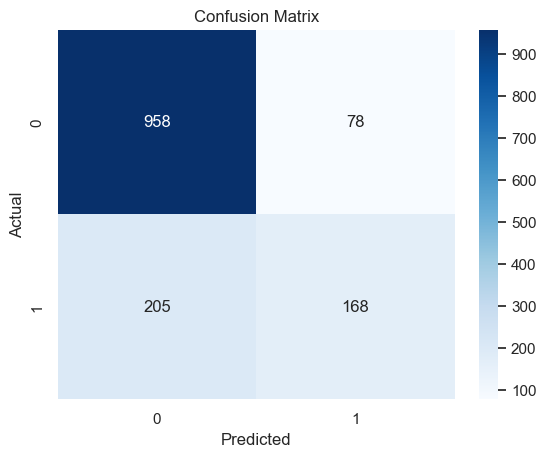

In [8]:
# Confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [9]:
# Classification report and accuracy
print(classification_report(y_test, y_pred))
print('Accuracy Score:', accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1036
           1       0.68      0.45      0.54       373

    accuracy                           0.80      1409
   macro avg       0.75      0.69      0.71      1409
weighted avg       0.79      0.80      0.78      1409

Accuracy Score: 0.7991483321504613


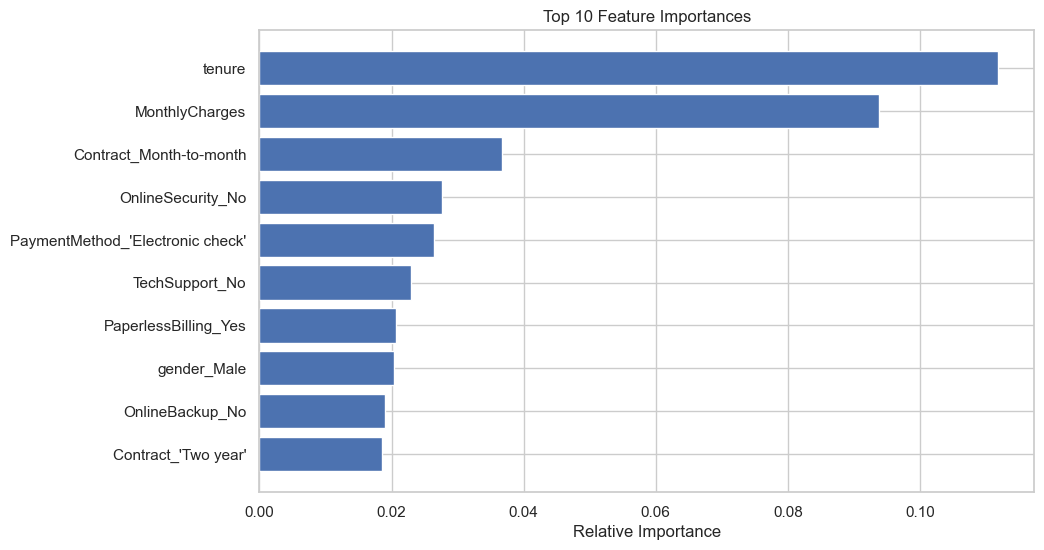

In [10]:
# Feature importance plot
importances = model.feature_importances_
indices = np.argsort(importances)[-10:]
plt.figure(figsize=(10, 6))
plt.title('Top 10 Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()